In [2]:
# First iteration
from keras.models import load_model

Using TensorFlow backend.


In [2]:
# Load the model
# the compile = False flag is to prevent a warning message - No training configuration found in the save file

path_to_model = "/home/jose/Documents/IPD441/Proyecto/keras-facenet/model/facenet_keras.h5"
model = load_model(path_to_model)

In [3]:
# Summarize input and output shapes
print(model.inputs)
print(model.outputs)
print(type(model))

[<tf.Tensor 'input_1:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/Identity:0' shape=(None, 128) dtype=float32>]
<class 'tensorflow.python.keras.engine.training.Model'>


In [3]:
# Importing the Multi-Task Convolutional Neural Network (MTCNN) for face detection and extraction

import os
import keras

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mtcnn import MTCNN
print(keras.__version__)

2.4.2


# 1) Face Extraction (using MTCNN)

In [5]:
# Extracting a face
face_path = "/home/jose/Documents/IPD441/Proyecto/imgs/1_kiko_loureiro.jpg"
#face_path = "/home/jose/Documents/IPD441/Proyecto/imgs/2_ozzy.jpeg"
img = Image.open(face_path)
img = img.convert('RGB')
pixels = np.asarray(img)
#pixels = plt.imread(face_path)
#pixels = cv2.cvtColor(cv2.imread(face_path), cv2.COLOR_BGR2RGB)

# Creating the detector
detector = MTCNN()
results = detector.detect_faces(pixels)
img.show()

In [6]:
# It's a JSON format with the bounding box coords of the face detected
print(results)

# Extracting the bounding box from the first face
x1, y1, width, height = results[0]["box"]
# Bug fix
x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y1 + height
print(x1)
print(y1)
print(x2)
print(y2)

# Face extraction from img
face = pixels[y1:y2, x1:x2] # These are just the pixels, as np.array

# Resize pixels of img to the model input size
actual_face = Image.fromarray(face)
actual_face = actual_face.resize((160,160))
face_array = np.asarray(actual_face)
actual_face.show()

[{'box': [275, 81, 125, 171], 'confidence': 0.9982905983924866, 'keypoints': {'left_eye': (299, 152), 'right_eye': (353, 137), 'nose': (328, 177), 'mouth_left': (321, 215), 'mouth_right': (366, 201)}}]
275
81
400
252


In [44]:
# Extract a single face from a given img
def extract_face(filename, required_size = (160,160)):
    img = Image.open(filename)
    img = img.convert("RGB")
    pixels = np.asarray(img)
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]["box"]
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    actual_face = Image.fromarray(face)
    actual_face = actual_face.resize(required_size)
    face_array = np.asarray(actual_face)
    return face_array

# Load the img and extract the face
#face = extract_face("/home/jose/Documents/IPD441/Proyecto/imgs/1_kiko_loureiro.jpg")
#Image.fromarray(face).show()

(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)


(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)


(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)


(160, 160, 3)
(160, 160, 3)


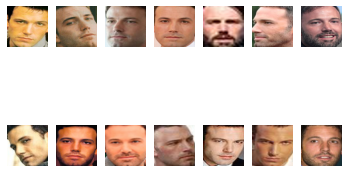

In [8]:
# Using the 5-celebrity-faces-dataset

folder = "../data/5-celebrity-faces-dataset/train/ben_afflek/"
i = 1

print

# Get files
for filename in os.listdir(folder):
    path = folder + filename
    face = extract_face(path)
    plt.subplot(2, 7, i)
    plt.axis("off")
    plt.imshow(face)
    print(face.shape)
    i += 1
plt.show()

In [9]:
print(os.listdir("../data/5-celebrity-faces-dataset/train/ben_afflek/"))
print(len(os.listdir("../data/5-celebrity-faces-dataset/train/ben_afflek/")))

['httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg', 'httpwwwhillsindcomstorebenjpg.jpg', 'httptrwebimgacstanetcxbdddmediasnmediajpg.jpg', 'httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg', 'httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg', 'httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg', 'httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg', 'httpcsvkmeuaeccjpg.jpg', 'httpwwwallposterscomimagesPostersPFjpg.jpg', 'httpwwwrumenewscomwpcontentuploadsbenafflekxpng.jpg', 'httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg', 'httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg', 'httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg', 'httpwwwfilmscoopitcgibinattoriBENAFFLECKBENAFFLECKjpg.jpg']
14


In [45]:
# Automate the above process
def load_faces(directory):
    faces = list()
    for filename in os.listdir(directory):
        path = directory + filename
        face = extract_face(path)
        faces.append(face)
    return faces

def load_dataset(directory):
    X, y = list(), list()
    for subdir in os.listdir(directory):
        #print(subdir)
        path = directory + subdir + "/"
        
        #print(path)
        
        if not os.path.isdir(path):
            continue
        
        faces = load_faces(path)
        labels = [subdir for _ in range(len(faces))]
        print(labels)
        print(">loaded %d examples for class: %s" % (len(faces), subdir))
        X.extend(faces)
        y.extend(labels)
    print(np.asarray(y))
    return np.asarray(X), np.asarray(y)

In [11]:
# Now, let's generate our datasets !!
trainX, trainy = load_dataset('../data/5-celebrity-faces-dataset/train/')
print(trainX.shape, trainy.shape)
testX, testy = load_dataset("../data/5-celebrity-faces-dataset/val/")
print(testX.shape, testy.shape)
np.savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)

['ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek']
>loaded 14 examples for class: ben_afflek


['elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john']
>loaded 17 examples for class: elton_john


['madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna']
>loaded 19 examples for class: madonna


['jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld']
>loaded 21 examples for class: jerry_seinfeld


['mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling']
>loaded 22 examples for class: mindy_kaling
['ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek'
 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek'
 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'elton_john'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_john' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna'
 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna'
 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna'
 

['ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek']
>loaded 5 examples for class: ben_afflek


['elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john']
>loaded 5 examples for class: elton_john


['madonna', 'madonna', 'madonna', 'madonna', 'madonna']
>loaded 5 examples for class: madonna


['jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld']
>loaded 5 examples for class: jerry_seinfeld


['mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling']
>loaded 5 examples for class: mindy_kaling
['ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'jerry_seinfeld'
 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'mindy_kaling' 'mindy_kaling' 'mindy_kaling' 'mindy_kaling'
 'mindy_kaling']
(25, 160, 160, 3) (25,)


In [12]:
# Face Detection for the 5-celebrity-faces-dataset
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN

def extract_face(filename, required_size = (160, 160)):
    image = Image.open(filename)
    image = image.convert("RGB")
    pixels = asarray(image)
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]["box"]
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

def load_faces(directory):
    faces = list()
    for filename in listdir(directory):
        path = directory + filename
        face = extract_face(path)
        faces.append(face)
    return faces

def load_dataset(directory):
    X, y = list(), list()
    for subdir in listdir(directory):
        path = directory + subdir + "/"
        if not isdir(path):
            continue
        
        faces = load_faces(path)
        labels = [subdir for _ in range(len(faces))]
        print(">loaded %d examples for class %s" % (len(faces), subdir))
        X.extend(faces)
        y.extend(labels)
    return asarray(X), asarray(labels)

trainX, trainy = load_dataset('../data/5-celebrity-faces-dataset/train/')
print(trainX.shape, trainy.shape)
testX, testy = load_dataset("../data/5-celebrity-faces-dataset/val/")
print(testX.shape, testy.shape)
np.savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)

KeyboardInterrupt: 

# 2) Create Face Embeddings (using FaceNet)

In [12]:
# Face embeddings

# 1) Load the dataset
data = np.load('5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data["arr_0"], data["arr_1"], data["arr_2"], data["arr_3"]
print("Loaded: ", trainX.shape, trainy.shape, testX.shape, testy.shape)

# 2) Load FaceNet model
path_to_model = "/home/jose/Documents/IPD441/Proyecto/keras-facenet/model/facenet_keras.h5"
model = load_model(path_to_model)

print(trainX[0])
print("------")
print(testy[0])

Loaded:  (93, 160, 160, 3) (93,) (25, 160, 160, 3) (25,)
[[[ 14   9   1]
  [ 13   8   1]
  [  9   5   1]
  ...
  [  4  11   3]
  [  5  12   4]
  [  5  12   4]]

 [[ 11   7   1]
  [ 10   6   1]
  [  7   4   1]
  ...
  [  4  10   3]
  [  5  11   4]
  [  5  11   4]]

 [[  4   2   0]
  [  4   2   0]
  [  2   2   0]
  ...
  [  4   7   2]
  [  6   8   3]
  [  6   8   3]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [169 167 155]
  [167 165 152]
  [166 164 151]]

 [[  0   0   0]
  [  0   0   0]
  [  0   1   0]
  ...
  [168 166 154]
  [166 164 151]
  [165 163 150]]

 [[  0   0   0]
  [  0   0   0]
  [  0   2   0]
  ...
  [168 166 153]
  [166 164 151]
  [165 163 150]]]
------
ben_afflek


In [13]:
# 3) Scale pixel values and standarize them
one_face = trainX[0]
mean, std = one_face.mean(), one_face.std()
one_face = (one_face - mean)/std
samples = np.expand_dims(one_face, axis = 0)

# 4) Prediction with FaceNet
yhat = model.predict(samples)
embedding = yhat[0]
embedding

array([-0.14253236, -0.48530564, -1.3747162 , -0.2258398 ,  0.9401449 ,
        0.339939  ,  1.0803773 ,  0.0342825 ,  0.130907  , -0.28117073,
        1.2194102 , -0.5012981 ,  0.42782068, -0.8026583 ,  1.1046745 ,
       -0.13212025, -2.1149073 ,  0.33217913, -0.22332153,  0.6119864 ,
        1.2843096 ,  0.6539228 , -0.06381566, -0.6356041 , -0.79517394,
       -1.0666804 ,  0.42151493, -1.3662897 , -0.15537041,  1.3093976 ,
        0.14363983,  0.5671468 ,  1.9784338 ,  0.58615685, -0.45476192,
        0.03971145, -2.1225996 , -0.07913183, -1.2515929 , -1.682751  ,
        1.7506306 , -0.65438205, -1.604694  , -0.7690348 ,  0.07962753,
       -2.0885975 ,  1.5133947 , -0.4416087 ,  1.0524861 , -0.06061952,
       -0.6631381 , -1.3532306 ,  0.16793942, -1.7254316 ,  0.5698124 ,
       -1.2739717 , -0.7690924 ,  0.9979315 ,  0.3089582 , -0.9561661 ,
       -1.1641974 , -0.41801417, -1.0494112 , -1.3200194 ,  0.58713263,
       -1.4994924 ,  0.01198711,  0.38348946,  0.24437898,  0.20

In [14]:
# Face embedding obtention (for one face)
def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype("float32")
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean)/std
    samples = np.expand_dims(face_pixels, axis = 0)
    yhat = model.predict(samples)
    return yhat[0]

data = np.load("5-celebrity-faces-dataset.npz")

trainX, trainy, testX, testy = data["arr_0"], data["arr_1"], data["arr_2"], data["arr_3"]
print("Loaded: ", trainX.shape, trainy.shape, testX.shape, testy.shape)

path_to_model = "/home/jose/Documents/IPD441/Proyecto/keras-facenet/model/facenet_keras.h5"
model = load_model(path_to_model)

newTrainX = list()
for face_pixels in trainX:
    embedding = get_embedding(model, face_pixels)
    newTrainX.append(embedding)
newTrainX = np.asarray(newTrainX)
print(newTrainX.shape)

newTestX = list()
for face_pixels in testX:
    embedding = get_embedding(model, face_pixels)
    newTestX.append(embedding)
newTestX = np.asarray(newTestX)
print(newTestX.shape)

np.savez_compressed('5-celebrity-faces-dataset-norm.npz',newTrainX, trainy, newTestX, testy)

Loaded:  (93, 160, 160, 3) (93,) (25, 160, 160, 3) (25,)
(93, 128)
(25, 128)


# 3) Perform Face Classification

In [15]:
# 1) Load dataset
data = np.load("5-celebrity-faces-dataset-norm.npz")
trainX, trainy, testX, testy = data["arr_0"], data["arr_1"], data["arr_2"], data["arr_3"]
print("Dataset: train=%d, test=%d" % (trainX.shape[0], testX.shape[0]))

Dataset: train=93, test=25


In [16]:
from sklearn.preprocessing import Normalizer, LabelEncoder

# 2) Normalize input vectors
in_encoder = Normalizer(norm = "l2")
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

# 3) Label encode targets
out_encoder = LabelEncoder()
#print(trainy[0])
#print(testy[0])
print(trainy)
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
print(trainy)
testy = out_encoder.transform(testy)
#trainX.shape
#trainy.shape

['ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek'
 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek'
 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'elton_john'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_john' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna'
 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna'
 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna'
 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'jerry_seinfeld' 'mindy_kaling' 'mindy_kaling' 'mind

In [17]:
from sklearn.svm import SVC

# 3) Fit the classification model (an SVC from scikit-learn)
model = SVC(kernel = "linear", probability = True)
model.fit(trainX, trainy)

SVC(kernel='linear', probability=True)

In [18]:
from sklearn.metrics import accuracy_score

# 4) Prediction testing
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)

# Score obtention
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)

# Summarize
print("Accuracy: train=%.3f, test=%.3f" % (score_train*100, score_test*100))

# As expected, given the size of the dataset and the face detection/recognition models used, the
# accuracy is perfect !!

Accuracy: train=100.000, test=100.000


In [19]:
from random import choice

# 5) Interesting part: plotting the original face and the predicted one
# Load the dataset
data = np.load("5-celebrity-faces-dataset.npz")
testX_faces = data["arr_2"]
#testX_faces

# 6) Test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
#print(selection)
#print(random_face_pixels)
print(random_face_class)
#print(random_face_name)

# 7) Prediction for a single face (the one chosen randomly)
samples = np.expand_dims(random_face_emb, axis = 0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
print(samples)
print(yhat_class)
print(yhat_prob)

4
[[ 1.37064699e-02 -7.47939199e-03 -3.56772467e-02  5.56544922e-02
  -8.03636163e-02  1.40266016e-01 -6.98407665e-02  5.57178706e-02
   7.48094022e-02  2.52245404e-02 -5.69930905e-03  7.02073276e-02
  -6.56863451e-02  4.43729535e-02 -7.54493549e-02 -3.03114355e-02
   6.91568106e-02  5.83557561e-02 -3.99177894e-02  1.42602120e-02
   7.47842118e-02 -8.35344940e-02  1.50495559e-01 -1.70016974e-01
   1.52936146e-01 -8.39823559e-02 -2.46012351e-03  1.60696626e-01
   7.82174058e-03 -8.98984224e-02 -1.03490800e-01 -6.31193891e-02
   6.04904070e-02 -1.70595631e-01  1.12554893e-01 -1.45586878e-01
  -9.23023075e-02  1.21824518e-02 -6.64144754e-02  3.17843165e-03
  -2.20698878e-01 -1.50612235e-01  1.63419377e-02 -3.97161730e-02
   9.47206840e-02 -5.28821237e-02 -1.61989793e-01  1.83960646e-01
   3.82943228e-02  4.41491939e-02  1.16029724e-01  3.39505039e-02
   1.52660802e-01 -8.46315771e-02  1.59807652e-01  6.45084605e-02
   4.05498073e-02  1.29868343e-01  5.22370301e-02 -9.13925990e-02
  -2.470

In [20]:
# 8) Get name of prediction
class_index = yhat_class[0]
class_probability = yhat_prob[0, class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)

#print(class_index)
#print(class_probability)
#print(predict_names)

# 9) Printing data
print("Predicted: %s (%.3f)" % (predict_names[0], class_probability))
print("Expected: %s" % random_face_name[0])

Predicted: mindy_kaling (91.569)
Expected: mindy_kaling


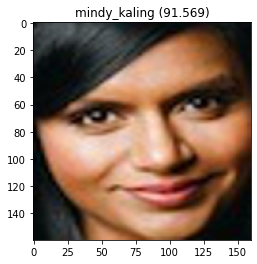

In [21]:
# 10) Plot of face pixels with name and probability
plt.imshow(random_face_pixels)
title = "%s (%.3f)" % (predict_names[0], class_probability)
plt.title(title)
plt.show()

# Dataset Playing

In [5]:
# Repeating the mentioned steps but with own datasets

# 1) Face Extraction
# OBS: This is made just once for every new dataset you have, because with this we obtain the numpy
# representation of every img involved in the train/validation datasets. 
# And also, because this is the step that takes more time (computing time)
trainX, trainy = load_dataset("/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/lfw_jostel_4/train/")
print(trainX.shape, trainy.shape)
testX, testy = load_dataset("/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/lfw_jostel_4/val/")
print(testX.shape, testy.shape)
np.savez_compressed('custom_lfw_jostel_4.npz', trainX, trainy, testX, testy)

['Mark_Philippoussis', 'Mark_Philippoussis', 'Mark_Philippoussis', 'Mark_Philippoussis', 'Mark_Philippoussis', 'Mark_Philippoussis', 'Mark_Philippoussis', 'Mark_Philippoussis']
>loaded 8 examples for class: Mark_Philippoussis


['Heizo_Takenaka', 'Heizo_Takenaka', 'Heizo_Takenaka', 'Heizo_Takenaka', 'Heizo_Takenaka', 'Heizo_Takenaka', 'Heizo_Takenaka']
>loaded 7 examples for class: Heizo_Takenaka


['Zhu_Rongji', 'Zhu_Rongji', 'Zhu_Rongji', 'Zhu_Rongji', 'Zhu_Rongji', 'Zhu_Rongji', 'Zhu_Rongji']
>loaded 7 examples for class: Zhu_Rongji


['Fidel_Castro', 'Fidel_Castro', 'Fidel_Castro', 'Fidel_Castro', 'Fidel_Castro', 'Fidel_Castro', 'Fidel_Castro', 'Fidel_Castro', 'Fidel_Castro', 'Fidel_Castro', 'Fidel_Castro', 'Fidel_Castro', 'Fidel_Castro', 'Fidel_Castro']
>loaded 14 examples for class: Fidel_Castro


['Paul_ONeill', 'Paul_ONeill', 'Paul_ONeill', 'Paul_ONeill', 'Paul_ONeill', 'Paul_ONeill', 'Paul_ONeill']
>loaded 7 examples for class: Paul_ONeill


['Harrison_Ford', 'Harrison_Ford', 'Harrison_Ford', 'Harrison_Ford', 'Harrison_Ford', 'Harrison_Ford', 'Harrison_Ford', 'Harrison_Ford', 'Harrison_Ford']
>loaded 9 examples for class: Harrison_Ford


['James_Blake', 'James_Blake', 'James_Blake', 'James_Blake', 'James_Blake', 'James_Blake', 'James_Blake', 'James_Blake', 'James_Blake', 'James_Blake', 'James_Blake']
>loaded 11 examples for class: James_Blake


['Ari_Fleischer', 'Ari_Fleischer', 'Ari_Fleischer', 'Ari_Fleischer', 'Ari_Fleischer', 'Ari_Fleischer', 'Ari_Fleischer', 'Ari_Fleischer', 'Ari_Fleischer', 'Ari_Fleischer']
>loaded 10 examples for class: Ari_Fleischer


['Michael_Jackson', 'Michael_Jackson', 'Michael_Jackson', 'Michael_Jackson', 'Michael_Jackson', 'Michael_Jackson', 'Michael_Jackson', 'Michael_Jackson', 'Michael_Jackson']
>loaded 9 examples for class: Michael_Jackson


['Tom_Hanks', 'Tom_Hanks', 'Tom_Hanks', 'Tom_Hanks', 'Tom_Hanks', 'Tom_Hanks', 'Tom_Hanks', 'Tom_Hanks']
>loaded 8 examples for class: Tom_Hanks


['George_HW_Bush', 'George_HW_Bush', 'George_HW_Bush', 'George_HW_Bush', 'George_HW_Bush', 'George_HW_Bush', 'George_HW_Bush', 'George_HW_Bush', 'George_HW_Bush', 'George_HW_Bush']
>loaded 10 examples for class: George_HW_Bush


['Britney_Spears', 'Britney_Spears', 'Britney_Spears', 'Britney_Spears', 'Britney_Spears', 'Britney_Spears', 'Britney_Spears', 'Britney_Spears', 'Britney_Spears', 'Britney_Spears', 'Britney_Spears']
>loaded 11 examples for class: Britney_Spears


['Sylvester_Stallone', 'Sylvester_Stallone', 'Sylvester_Stallone', 'Sylvester_Stallone', 'Sylvester_Stallone', 'Sylvester_Stallone', 'Sylvester_Stallone']
>loaded 7 examples for class: Sylvester_Stallone


['James_Kelly', 'James_Kelly', 'James_Kelly', 'James_Kelly', 'James_Kelly', 'James_Kelly', 'James_Kelly', 'James_Kelly']
>loaded 8 examples for class: James_Kelly


['John_Allen_Muhammad', 'John_Allen_Muhammad', 'John_Allen_Muhammad', 'John_Allen_Muhammad', 'John_Allen_Muhammad', 'John_Allen_Muhammad', 'John_Allen_Muhammad', 'John_Allen_Muhammad']
>loaded 8 examples for class: John_Allen_Muhammad


['Norah_Jones', 'Norah_Jones', 'Norah_Jones', 'Norah_Jones', 'Norah_Jones', 'Norah_Jones', 'Norah_Jones', 'Norah_Jones', 'Norah_Jones', 'Norah_Jones', 'Norah_Jones', 'Norah_Jones']
>loaded 12 examples for class: Norah_Jones


['Condoleezza_Rice', 'Condoleezza_Rice', 'Condoleezza_Rice', 'Condoleezza_Rice', 'Condoleezza_Rice', 'Condoleezza_Rice', 'Condoleezza_Rice', 'Condoleezza_Rice']
>loaded 8 examples for class: Condoleezza_Rice


['Tang_Jiaxuan', 'Tang_Jiaxuan', 'Tang_Jiaxuan', 'Tang_Jiaxuan', 'Tang_Jiaxuan', 'Tang_Jiaxuan', 'Tang_Jiaxuan', 'Tang_Jiaxuan']
>loaded 8 examples for class: Tang_Jiaxuan


['Anna_Kournikova', 'Anna_Kournikova', 'Anna_Kournikova', 'Anna_Kournikova', 'Anna_Kournikova', 'Anna_Kournikova', 'Anna_Kournikova', 'Anna_Kournikova', 'Anna_Kournikova']
>loaded 9 examples for class: Anna_Kournikova


['Wen_Jiabao', 'Wen_Jiabao', 'Wen_Jiabao', 'Wen_Jiabao', 'Wen_Jiabao', 'Wen_Jiabao', 'Wen_Jiabao', 'Wen_Jiabao', 'Wen_Jiabao', 'Wen_Jiabao']
>loaded 10 examples for class: Wen_Jiabao


['Nicanor_Duarte_Frutos', 'Nicanor_Duarte_Frutos', 'Nicanor_Duarte_Frutos', 'Nicanor_Duarte_Frutos', 'Nicanor_Duarte_Frutos', 'Nicanor_Duarte_Frutos', 'Nicanor_Duarte_Frutos', 'Nicanor_Duarte_Frutos']
>loaded 8 examples for class: Nicanor_Duarte_Frutos


['David_Nalbandian', 'David_Nalbandian', 'David_Nalbandian', 'David_Nalbandian', 'David_Nalbandian', 'David_Nalbandian', 'David_Nalbandian', 'David_Nalbandian', 'David_Nalbandian', 'David_Nalbandian', 'David_Nalbandian']
>loaded 11 examples for class: David_Nalbandian


['Richard_Gephardt', 'Richard_Gephardt', 'Richard_Gephardt', 'Richard_Gephardt', 'Richard_Gephardt', 'Richard_Gephardt', 'Richard_Gephardt', 'Richard_Gephardt']
>loaded 8 examples for class: Richard_Gephardt


['Jackie_Chan', 'Jackie_Chan', 'Jackie_Chan', 'Jackie_Chan', 'Jackie_Chan', 'Jackie_Chan', 'Jackie_Chan', 'Jackie_Chan', 'Jackie_Chan', 'Jackie_Chan']
>loaded 10 examples for class: Jackie_Chan


['Kim_Clijsters', 'Kim_Clijsters', 'Kim_Clijsters', 'Kim_Clijsters', 'Kim_Clijsters', 'Kim_Clijsters', 'Kim_Clijsters', 'Kim_Clijsters', 'Kim_Clijsters', 'Kim_Clijsters', 'Kim_Clijsters']
>loaded 11 examples for class: Kim_Clijsters


['Li_Peng', 'Li_Peng', 'Li_Peng', 'Li_Peng', 'Li_Peng', 'Li_Peng', 'Li_Peng']
>loaded 7 examples for class: Li_Peng


['Howard_Dean', 'Howard_Dean', 'Howard_Dean', 'Howard_Dean', 'Howard_Dean', 'Howard_Dean', 'Howard_Dean', 'Howard_Dean', 'Howard_Dean']
>loaded 9 examples for class: Howard_Dean


['Leonardo_DiCaprio', 'Leonardo_DiCaprio', 'Leonardo_DiCaprio', 'Leonardo_DiCaprio', 'Leonardo_DiCaprio', 'Leonardo_DiCaprio', 'Leonardo_DiCaprio']
>loaded 7 examples for class: Leonardo_DiCaprio


['Tom_Cruise', 'Tom_Cruise', 'Tom_Cruise', 'Tom_Cruise', 'Tom_Cruise', 'Tom_Cruise', 'Tom_Cruise', 'Tom_Cruise']
>loaded 8 examples for class: Tom_Cruise


['Paul_Wolfowitz', 'Paul_Wolfowitz', 'Paul_Wolfowitz', 'Paul_Wolfowitz', 'Paul_Wolfowitz', 'Paul_Wolfowitz', 'Paul_Wolfowitz', 'Paul_Wolfowitz']
>loaded 8 examples for class: Paul_Wolfowitz


['Tung_Chee-hwa', 'Tung_Chee-hwa', 'Tung_Chee-hwa', 'Tung_Chee-hwa', 'Tung_Chee-hwa', 'Tung_Chee-hwa', 'Tung_Chee-hwa']
>loaded 7 examples for class: Tung_Chee-hwa


['Hillary_Clinton', 'Hillary_Clinton', 'Hillary_Clinton', 'Hillary_Clinton', 'Hillary_Clinton', 'Hillary_Clinton', 'Hillary_Clinton', 'Hillary_Clinton', 'Hillary_Clinton', 'Hillary_Clinton', 'Hillary_Clinton']
>loaded 11 examples for class: Hillary_Clinton


['Kim_Ryong-sung', 'Kim_Ryong-sung', 'Kim_Ryong-sung', 'Kim_Ryong-sung', 'Kim_Ryong-sung', 'Kim_Ryong-sung', 'Kim_Ryong-sung', 'Kim_Ryong-sung']
>loaded 8 examples for class: Kim_Ryong-sung


['Andy_Roddick', 'Andy_Roddick', 'Andy_Roddick', 'Andy_Roddick', 'Andy_Roddick', 'Andy_Roddick', 'Andy_Roddick', 'Andy_Roddick', 'Andy_Roddick', 'Andy_Roddick', 'Andy_Roddick', 'Andy_Roddick']
>loaded 12 examples for class: Andy_Roddick


['Mahathir_Mohamad', 'Mahathir_Mohamad', 'Mahathir_Mohamad', 'Mahathir_Mohamad', 'Mahathir_Mohamad', 'Mahathir_Mohamad', 'Mahathir_Mohamad', 'Mahathir_Mohamad', 'Mahathir_Mohamad', 'Mahathir_Mohamad', 'Mahathir_Mohamad']
>loaded 11 examples for class: Mahathir_Mohamad


['Queen_Elizabeth_II', 'Queen_Elizabeth_II', 'Queen_Elizabeth_II', 'Queen_Elizabeth_II', 'Queen_Elizabeth_II', 'Queen_Elizabeth_II', 'Queen_Elizabeth_II', 'Queen_Elizabeth_II', 'Queen_Elizabeth_II', 'Queen_Elizabeth_II']
>loaded 10 examples for class: Queen_Elizabeth_II


['Pierce_Brosnan', 'Pierce_Brosnan', 'Pierce_Brosnan', 'Pierce_Brosnan', 'Pierce_Brosnan', 'Pierce_Brosnan', 'Pierce_Brosnan', 'Pierce_Brosnan', 'Pierce_Brosnan', 'Pierce_Brosnan', 'Pierce_Brosnan', 'Pierce_Brosnan']
>loaded 12 examples for class: Pierce_Brosnan


['Salma_Hayek', 'Salma_Hayek', 'Salma_Hayek', 'Salma_Hayek', 'Salma_Hayek', 'Salma_Hayek', 'Salma_Hayek', 'Salma_Hayek', 'Salma_Hayek', 'Salma_Hayek']
>loaded 10 examples for class: Salma_Hayek


['Roger_Federer', 'Roger_Federer', 'Roger_Federer', 'Roger_Federer', 'Roger_Federer', 'Roger_Federer', 'Roger_Federer', 'Roger_Federer', 'Roger_Federer', 'Roger_Federer', 'Roger_Federer']
>loaded 11 examples for class: Roger_Federer


['Charles_Moose', 'Charles_Moose', 'Charles_Moose', 'Charles_Moose', 'Charles_Moose', 'Charles_Moose', 'Charles_Moose', 'Charles_Moose', 'Charles_Moose', 'Charles_Moose']
>loaded 10 examples for class: Charles_Moose


['Jeb_Bush', 'Jeb_Bush', 'Jeb_Bush', 'Jeb_Bush', 'Jeb_Bush', 'Jeb_Bush', 'Jeb_Bush', 'Jeb_Bush', 'Jeb_Bush']
>loaded 9 examples for class: Jeb_Bush


['Nancy_Pelosi', 'Nancy_Pelosi', 'Nancy_Pelosi', 'Nancy_Pelosi', 'Nancy_Pelosi', 'Nancy_Pelosi', 'Nancy_Pelosi', 'Nancy_Pelosi', 'Nancy_Pelosi', 'Nancy_Pelosi', 'Nancy_Pelosi', 'Nancy_Pelosi']
>loaded 12 examples for class: Nancy_Pelosi


['Rubens_Barrichello', 'Rubens_Barrichello', 'Rubens_Barrichello', 'Rubens_Barrichello', 'Rubens_Barrichello', 'Rubens_Barrichello', 'Rubens_Barrichello', 'Rubens_Barrichello', 'Rubens_Barrichello']
>loaded 9 examples for class: Rubens_Barrichello


['Vaclav_Havel', 'Vaclav_Havel', 'Vaclav_Havel', 'Vaclav_Havel', 'Vaclav_Havel', 'Vaclav_Havel', 'Vaclav_Havel']
>loaded 7 examples for class: Vaclav_Havel


['Jeong_Se-hyun', 'Jeong_Se-hyun', 'Jeong_Se-hyun', 'Jeong_Se-hyun', 'Jeong_Se-hyun', 'Jeong_Se-hyun', 'Jeong_Se-hyun']
>loaded 7 examples for class: Jeong_Se-hyun


['Lucio_Gutierrez', 'Lucio_Gutierrez', 'Lucio_Gutierrez', 'Lucio_Gutierrez', 'Lucio_Gutierrez', 'Lucio_Gutierrez', 'Lucio_Gutierrez', 'Lucio_Gutierrez', 'Lucio_Gutierrez', 'Lucio_Gutierrez']
>loaded 10 examples for class: Lucio_Gutierrez


['Mohammed_Al-Douri', 'Mohammed_Al-Douri', 'Mohammed_Al-Douri', 'Mohammed_Al-Douri', 'Mohammed_Al-Douri', 'Mohammed_Al-Douri', 'Mohammed_Al-Douri', 'Mohammed_Al-Douri', 'Mohammed_Al-Douri', 'Mohammed_Al-Douri', 'Mohammed_Al-Douri', 'Mohammed_Al-Douri']
>loaded 12 examples for class: Mohammed_Al-Douri


['Hu_Jintao', 'Hu_Jintao', 'Hu_Jintao', 'Hu_Jintao', 'Hu_Jintao', 'Hu_Jintao', 'Hu_Jintao', 'Hu_Jintao', 'Hu_Jintao', 'Hu_Jintao', 'Hu_Jintao', 'Hu_Jintao']
>loaded 12 examples for class: Hu_Jintao


['Eduardo_Duhalde', 'Eduardo_Duhalde', 'Eduardo_Duhalde', 'Eduardo_Duhalde', 'Eduardo_Duhalde', 'Eduardo_Duhalde', 'Eduardo_Duhalde', 'Eduardo_Duhalde', 'Eduardo_Duhalde', 'Eduardo_Duhalde', 'Eduardo_Duhalde']
>loaded 11 examples for class: Eduardo_Duhalde


['Hugh_Grant', 'Hugh_Grant', 'Hugh_Grant', 'Hugh_Grant', 'Hugh_Grant', 'Hugh_Grant', 'Hugh_Grant']
>loaded 7 examples for class: Hugh_Grant


['Thomas_OBrien', 'Thomas_OBrien', 'Thomas_OBrien', 'Thomas_OBrien', 'Thomas_OBrien', 'Thomas_OBrien', 'Thomas_OBrien']
>loaded 7 examples for class: Thomas_OBrien


['Muhammad_Ali', 'Muhammad_Ali', 'Muhammad_Ali', 'Muhammad_Ali', 'Muhammad_Ali', 'Muhammad_Ali', 'Muhammad_Ali', 'Muhammad_Ali']
>loaded 8 examples for class: Muhammad_Ali


['Catherine_Zeta-Jones', 'Catherine_Zeta-Jones', 'Catherine_Zeta-Jones', 'Catherine_Zeta-Jones', 'Catherine_Zeta-Jones', 'Catherine_Zeta-Jones', 'Catherine_Zeta-Jones', 'Catherine_Zeta-Jones']
>loaded 8 examples for class: Catherine_Zeta-Jones


['Dick_Cheney', 'Dick_Cheney', 'Dick_Cheney', 'Dick_Cheney', 'Dick_Cheney', 'Dick_Cheney', 'Dick_Cheney', 'Dick_Cheney', 'Dick_Cheney', 'Dick_Cheney', 'Dick_Cheney']
>loaded 11 examples for class: Dick_Cheney


['Jean-David_Levitte', 'Jean-David_Levitte', 'Jean-David_Levitte', 'Jean-David_Levitte', 'Jean-David_Levitte', 'Jean-David_Levitte', 'Jean-David_Levitte', 'Jean-David_Levitte']
>loaded 8 examples for class: Jean-David_Levitte


['Fernando_Gonzalez', 'Fernando_Gonzalez', 'Fernando_Gonzalez', 'Fernando_Gonzalez', 'Fernando_Gonzalez', 'Fernando_Gonzalez', 'Fernando_Gonzalez']
>loaded 7 examples for class: Fernando_Gonzalez


['Jennifer_Garner', 'Jennifer_Garner', 'Jennifer_Garner', 'Jennifer_Garner', 'Jennifer_Garner', 'Jennifer_Garner', 'Jennifer_Garner', 'Jennifer_Garner', 'Jennifer_Garner']
>loaded 9 examples for class: Jennifer_Garner


['Mohammad_Khatami', 'Mohammad_Khatami', 'Mohammad_Khatami', 'Mohammad_Khatami', 'Mohammad_Khatami', 'Mohammad_Khatami', 'Mohammad_Khatami', 'Mohammad_Khatami']
>loaded 8 examples for class: Mohammad_Khatami


['Meryl_Streep', 'Meryl_Streep', 'Meryl_Streep', 'Meryl_Streep', 'Meryl_Streep', 'Meryl_Streep', 'Meryl_Streep', 'Meryl_Streep', 'Meryl_Streep', 'Meryl_Streep', 'Meryl_Streep', 'Meryl_Streep']
>loaded 12 examples for class: Meryl_Streep


['George_Clooney', 'George_Clooney', 'George_Clooney', 'George_Clooney', 'George_Clooney', 'George_Clooney', 'George_Clooney']
>loaded 7 examples for class: George_Clooney


['Bill_Gates', 'Bill_Gates', 'Bill_Gates', 'Bill_Gates', 'Bill_Gates', 'Bill_Gates', 'Bill_Gates', 'Bill_Gates', 'Bill_Gates', 'Bill_Gates', 'Bill_Gates', 'Bill_Gates', 'Bill_Gates']
>loaded 13 examples for class: Bill_Gates


['Kate_Hudson', 'Kate_Hudson', 'Kate_Hudson', 'Kate_Hudson', 'Kate_Hudson', 'Kate_Hudson', 'Kate_Hudson']
>loaded 7 examples for class: Kate_Hudson


['Jimmy_Carter', 'Jimmy_Carter', 'Jimmy_Carter', 'Jimmy_Carter', 'Jimmy_Carter', 'Jimmy_Carter', 'Jimmy_Carter']
>loaded 7 examples for class: Jimmy_Carter


['Ray_Romano', 'Ray_Romano', 'Ray_Romano', 'Ray_Romano', 'Ray_Romano', 'Ray_Romano', 'Ray_Romano']
>loaded 7 examples for class: Ray_Romano


['Keanu_Reeves', 'Keanu_Reeves', 'Keanu_Reeves', 'Keanu_Reeves', 'Keanu_Reeves', 'Keanu_Reeves', 'Keanu_Reeves', 'Keanu_Reeves', 'Keanu_Reeves']
>loaded 9 examples for class: Keanu_Reeves
['Mark_Philippoussis' 'Mark_Philippoussis' 'Mark_Philippoussis'
 'Mark_Philippoussis' 'Mark_Philippoussis' 'Mark_Philippoussis'
 'Mark_Philippoussis' 'Mark_Philippoussis' 'Heizo_Takenaka'
 'Heizo_Takenaka' 'Heizo_Takenaka' 'Heizo_Takenaka' 'Heizo_Takenaka'
 'Heizo_Takenaka' 'Heizo_Takenaka' 'Zhu_Rongji' 'Zhu_Rongji' 'Zhu_Rongji'
 'Zhu_Rongji' 'Zhu_Rongji' 'Zhu_Rongji' 'Zhu_Rongji' 'Fidel_Castro'
 'Fidel_Castro' 'Fidel_Castro' 'Fidel_Castro' 'Fidel_Castro'
 'Fidel_Castro' 'Fidel_Castro' 'Fidel_Castro' 'Fidel_Castro'
 'Fidel_Castro' 'Fidel_Castro' 'Fidel_Castro' 'Fidel_Castro'
 'Fidel_Castro' 'Paul_ONeill' 'Paul_ONeill' 'Paul_ONeill' 'Paul_ONeill'
 'Paul_ONeill' 'Paul_ONeill' 'Paul_ONeill' 'Harrison_Ford' 'Harrison_Ford'
 'Harrison_Ford' 'Harrison_Ford' 'Harrison_Ford' 'Harrison_Ford'
 'Harrison_Ford' '

(594, 160, 160, 3) (594,)
['Mark_Philippoussis', 'Mark_Philippoussis', 'Mark_Philippoussis']
>loaded 3 examples for class: Mark_Philippoussis


['Heizo_Takenaka', 'Heizo_Takenaka']
>loaded 2 examples for class: Heizo_Takenaka


['Zhu_Rongji', 'Zhu_Rongji']
>loaded 2 examples for class: Zhu_Rongji


['Fidel_Castro', 'Fidel_Castro', 'Fidel_Castro', 'Fidel_Castro']
>loaded 4 examples for class: Fidel_Castro
['Paul_ONeill', 'Paul_ONeill']
>loaded 2 examples for class: Paul_ONeill


['Harrison_Ford', 'Harrison_Ford', 'Harrison_Ford']
>loaded 3 examples for class: Harrison_Ford


['James_Blake', 'James_Blake', 'James_Blake']
>loaded 3 examples for class: James_Blake


['Ari_Fleischer', 'Ari_Fleischer', 'Ari_Fleischer']
>loaded 3 examples for class: Ari_Fleischer


['Michael_Jackson', 'Michael_Jackson', 'Michael_Jackson']
>loaded 3 examples for class: Michael_Jackson
['Tom_Hanks', 'Tom_Hanks']
>loaded 2 examples for class: Tom_Hanks


['George_HW_Bush', 'George_HW_Bush', 'George_HW_Bush']
>loaded 3 examples for class: George_HW_Bush


['Britney_Spears', 'Britney_Spears', 'Britney_Spears']
>loaded 3 examples for class: Britney_Spears


['Sylvester_Stallone', 'Sylvester_Stallone']
>loaded 2 examples for class: Sylvester_Stallone
['James_Kelly', 'James_Kelly', 'James_Kelly']
>loaded 3 examples for class: James_Kelly


['John_Allen_Muhammad', 'John_Allen_Muhammad', 'John_Allen_Muhammad']
>loaded 3 examples for class: John_Allen_Muhammad


['Norah_Jones', 'Norah_Jones', 'Norah_Jones']
>loaded 3 examples for class: Norah_Jones


['Condoleezza_Rice', 'Condoleezza_Rice', 'Condoleezza_Rice']
>loaded 3 examples for class: Condoleezza_Rice


['Tang_Jiaxuan', 'Tang_Jiaxuan', 'Tang_Jiaxuan']
>loaded 3 examples for class: Tang_Jiaxuan


['Anna_Kournikova', 'Anna_Kournikova', 'Anna_Kournikova']
>loaded 3 examples for class: Anna_Kournikova


['Wen_Jiabao', 'Wen_Jiabao', 'Wen_Jiabao']
>loaded 3 examples for class: Wen_Jiabao
['Nicanor_Duarte_Frutos', 'Nicanor_Duarte_Frutos', 'Nicanor_Duarte_Frutos']
>loaded 3 examples for class: Nicanor_Duarte_Frutos


['David_Nalbandian', 'David_Nalbandian', 'David_Nalbandian']
>loaded 3 examples for class: David_Nalbandian


['Richard_Gephardt', 'Richard_Gephardt', 'Richard_Gephardt']
>loaded 3 examples for class: Richard_Gephardt


['Jackie_Chan', 'Jackie_Chan', 'Jackie_Chan']
>loaded 3 examples for class: Jackie_Chan


['Kim_Clijsters', 'Kim_Clijsters', 'Kim_Clijsters']
>loaded 3 examples for class: Kim_Clijsters
['Li_Peng', 'Li_Peng']
>loaded 2 examples for class: Li_Peng


['Howard_Dean', 'Howard_Dean', 'Howard_Dean']
>loaded 3 examples for class: Howard_Dean


['Leonardo_DiCaprio', 'Leonardo_DiCaprio']
>loaded 2 examples for class: Leonardo_DiCaprio
['Tom_Cruise', 'Tom_Cruise']
>loaded 2 examples for class: Tom_Cruise


['Paul_Wolfowitz', 'Paul_Wolfowitz']
>loaded 2 examples for class: Paul_Wolfowitz


['Tung_Chee-hwa', 'Tung_Chee-hwa']
>loaded 2 examples for class: Tung_Chee-hwa
['Hillary_Clinton', 'Hillary_Clinton', 'Hillary_Clinton']
>loaded 3 examples for class: Hillary_Clinton


['Kim_Ryong-sung', 'Kim_Ryong-sung', 'Kim_Ryong-sung']
>loaded 3 examples for class: Kim_Ryong-sung


['Andy_Roddick', 'Andy_Roddick', 'Andy_Roddick']
>loaded 3 examples for class: Andy_Roddick


['Mahathir_Mohamad', 'Mahathir_Mohamad', 'Mahathir_Mohamad']
>loaded 3 examples for class: Mahathir_Mohamad


['Queen_Elizabeth_II', 'Queen_Elizabeth_II', 'Queen_Elizabeth_II']
>loaded 3 examples for class: Queen_Elizabeth_II


['Pierce_Brosnan', 'Pierce_Brosnan', 'Pierce_Brosnan']
>loaded 3 examples for class: Pierce_Brosnan


['Salma_Hayek', 'Salma_Hayek', 'Salma_Hayek']
>loaded 3 examples for class: Salma_Hayek
['Roger_Federer', 'Roger_Federer', 'Roger_Federer']
>loaded 3 examples for class: Roger_Federer


['Charles_Moose', 'Charles_Moose', 'Charles_Moose']
>loaded 3 examples for class: Charles_Moose


['Jeb_Bush', 'Jeb_Bush', 'Jeb_Bush']
>loaded 3 examples for class: Jeb_Bush


['Nancy_Pelosi', 'Nancy_Pelosi', 'Nancy_Pelosi']
>loaded 3 examples for class: Nancy_Pelosi


['Rubens_Barrichello', 'Rubens_Barrichello', 'Rubens_Barrichello']
>loaded 3 examples for class: Rubens_Barrichello
['Vaclav_Havel', 'Vaclav_Havel']
>loaded 2 examples for class: Vaclav_Havel


['Jeong_Se-hyun', 'Jeong_Se-hyun']
>loaded 2 examples for class: Jeong_Se-hyun


['Lucio_Gutierrez', 'Lucio_Gutierrez', 'Lucio_Gutierrez']
>loaded 3 examples for class: Lucio_Gutierrez


['Mohammed_Al-Douri', 'Mohammed_Al-Douri', 'Mohammed_Al-Douri']
>loaded 3 examples for class: Mohammed_Al-Douri


['Hu_Jintao', 'Hu_Jintao', 'Hu_Jintao']
>loaded 3 examples for class: Hu_Jintao
['Eduardo_Duhalde', 'Eduardo_Duhalde', 'Eduardo_Duhalde']
>loaded 3 examples for class: Eduardo_Duhalde


['Hugh_Grant', 'Hugh_Grant']
>loaded 2 examples for class: Hugh_Grant


['Thomas_OBrien', 'Thomas_OBrien']
>loaded 2 examples for class: Thomas_OBrien
['Muhammad_Ali', 'Muhammad_Ali']
>loaded 2 examples for class: Muhammad_Ali


['Catherine_Zeta-Jones', 'Catherine_Zeta-Jones', 'Catherine_Zeta-Jones']
>loaded 3 examples for class: Catherine_Zeta-Jones


['Dick_Cheney', 'Dick_Cheney', 'Dick_Cheney']
>loaded 3 examples for class: Dick_Cheney
['Jean-David_Levitte', 'Jean-David_Levitte']
>loaded 2 examples for class: Jean-David_Levitte


['Fernando_Gonzalez', 'Fernando_Gonzalez']
>loaded 2 examples for class: Fernando_Gonzalez


['Jennifer_Garner', 'Jennifer_Garner', 'Jennifer_Garner']
>loaded 3 examples for class: Jennifer_Garner
['Mohammad_Khatami', 'Mohammad_Khatami']
>loaded 2 examples for class: Mohammad_Khatami


['Meryl_Streep', 'Meryl_Streep', 'Meryl_Streep']
>loaded 3 examples for class: Meryl_Streep


['George_Clooney', 'George_Clooney']
>loaded 2 examples for class: George_Clooney


['Bill_Gates', 'Bill_Gates', 'Bill_Gates', 'Bill_Gates']
>loaded 4 examples for class: Bill_Gates


['Kate_Hudson', 'Kate_Hudson']
>loaded 2 examples for class: Kate_Hudson
['Jimmy_Carter', 'Jimmy_Carter']
>loaded 2 examples for class: Jimmy_Carter


['Ray_Romano', 'Ray_Romano']
>loaded 2 examples for class: Ray_Romano


['Keanu_Reeves', 'Keanu_Reeves', 'Keanu_Reeves']
>loaded 3 examples for class: Keanu_Reeves
['Mark_Philippoussis' 'Mark_Philippoussis' 'Mark_Philippoussis'
 'Heizo_Takenaka' 'Heizo_Takenaka' 'Zhu_Rongji' 'Zhu_Rongji'
 'Fidel_Castro' 'Fidel_Castro' 'Fidel_Castro' 'Fidel_Castro' 'Paul_ONeill'
 'Paul_ONeill' 'Harrison_Ford' 'Harrison_Ford' 'Harrison_Ford'
 'James_Blake' 'James_Blake' 'James_Blake' 'Ari_Fleischer' 'Ari_Fleischer'
 'Ari_Fleischer' 'Michael_Jackson' 'Michael_Jackson' 'Michael_Jackson'
 'Tom_Hanks' 'Tom_Hanks' 'George_HW_Bush' 'George_HW_Bush'
 'George_HW_Bush' 'Britney_Spears' 'Britney_Spears' 'Britney_Spears'
 'Sylvester_Stallone' 'Sylvester_Stallone' 'James_Kelly' 'James_Kelly'
 'James_Kelly' 'John_Allen_Muhammad' 'John_Allen_Muhammad'
 'John_Allen_Muhammad' 'Norah_Jones' 'Norah_Jones' 'Norah_Jones'
 'Condoleezza_Rice' 'Condoleezza_Rice' 'Condoleezza_Rice' 'Tang_Jiaxuan'
 'Tang_Jiaxuan' 'Tang_Jiaxuan' 'Anna_Kournikova' 'Anna_Kournikova'
 'Anna_Kournikova' 'Wen_Jiabao' 'Wen

In [6]:
# 2) Face embeddings

# a) Load the dataset
data = np.load('custom_lfw_jostel_4.npz')
trainX, trainy, testX, testy = data["arr_0"], data["arr_1"], data["arr_2"], data["arr_3"]
print("Loaded: ", trainX.shape, trainy.shape, testX.shape, testy.shape)

# b) Load FaceNet model
path_to_model = "/home/jose/Documents/IPD441/Proyecto/keras-facenet/model/facenet_keras.h5"
model = load_model(path_to_model)

print(trainX[0])
print("------")
print(testy[0])

Loaded:  (594, 160, 160, 3) (594,) (175, 160, 160, 3) (175,)
[[[ 19  30  24]
  [ 22  32  27]
  [ 26  36  31]
  ...
  [ 26  32  28]
  [ 27  33  31]
  [ 28  34  32]]

 [[ 18  28  24]
  [ 21  30  26]
  [ 25  34  29]
  ...
  [ 28  34  29]
  [ 26  32  29]
  [ 26  32  29]]

 [[ 17  25  24]
  [ 20  27  24]
  [ 25  31  27]
  ...
  [ 31  36  29]
  [ 26  32  27]
  [ 23  30  25]]

 ...

 [[106  26  25]
  [107  27  25]
  [108  29  26]
  ...
  [214  75  40]
  [219  79  43]
  [222  81  44]]

 [[105  26  24]
  [105  27  24]
  [106  28  24]
  ...
  [220  78  43]
  [224  81  46]
  [226  83  47]]

 [[104  26  22]
  [104  27  22]
  [105  28  23]
  ...
  [224  80  45]
  [227  83  48]
  [228  84  49]]]
------
Mark_Philippoussis


In [7]:
# Face embedding obtention (for one face)
def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype("float32")
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean)/std
    samples = np.expand_dims(face_pixels, axis = 0)
    yhat = model.predict(samples)
    return yhat[0]

newTrainX = list()
for face_pixels in trainX:
    embedding = get_embedding(model, face_pixels)
    newTrainX.append(embedding)
newTrainX = np.asarray(newTrainX)
print(newTrainX.shape)

newTestX = list()
for face_pixels in testX:
    embedding = get_embedding(model, face_pixels)
    newTestX.append(embedding)
newTestX = np.asarray(newTestX)
print(newTestX.shape)

np.savez_compressed('custom_lfw_jostel_4_embeddings.npz',newTrainX, trainy, newTestX, testy)

(594, 128)
(175, 128)


In [9]:
# 3) Classification

# a) Load dataset
data = np.load("custom_lfw_jostel_4_embeddings.npz")
trainX, trainy, testX, testy = data["arr_0"], data["arr_1"], data["arr_2"], data["arr_3"]
print("Dataset: train=%d, test=%d" % (trainX.shape[0], testX.shape[0]))

Dataset: train=594, test=175


In [10]:
from sklearn.preprocessing import Normalizer, LabelEncoder

# 2) Normalize input vectors
in_encoder = Normalizer(norm = "l2")
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

# 3) Label encode targets
out_encoder = LabelEncoder()
#print(trainy[0])
#print(testy[0])
print(trainy)
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
print(trainy)
testy = out_encoder.transform(testy)
#trainX.shape
#trainy.shape

['Mark_Philippoussis' 'Mark_Philippoussis' 'Mark_Philippoussis'
 'Mark_Philippoussis' 'Mark_Philippoussis' 'Mark_Philippoussis'
 'Mark_Philippoussis' 'Mark_Philippoussis' 'Heizo_Takenaka'
 'Heizo_Takenaka' 'Heizo_Takenaka' 'Heizo_Takenaka' 'Heizo_Takenaka'
 'Heizo_Takenaka' 'Heizo_Takenaka' 'Zhu_Rongji' 'Zhu_Rongji' 'Zhu_Rongji'
 'Zhu_Rongji' 'Zhu_Rongji' 'Zhu_Rongji' 'Zhu_Rongji' 'Fidel_Castro'
 'Fidel_Castro' 'Fidel_Castro' 'Fidel_Castro' 'Fidel_Castro'
 'Fidel_Castro' 'Fidel_Castro' 'Fidel_Castro' 'Fidel_Castro'
 'Fidel_Castro' 'Fidel_Castro' 'Fidel_Castro' 'Fidel_Castro'
 'Fidel_Castro' 'Paul_ONeill' 'Paul_ONeill' 'Paul_ONeill' 'Paul_ONeill'
 'Paul_ONeill' 'Paul_ONeill' 'Paul_ONeill' 'Harrison_Ford' 'Harrison_Ford'
 'Harrison_Ford' 'Harrison_Ford' 'Harrison_Ford' 'Harrison_Ford'
 'Harrison_Ford' 'Harrison_Ford' 'Harrison_Ford' 'James_Blake'
 'James_Blake' 'James_Blake' 'James_Blake' 'James_Blake' 'James_Blake'
 'James_Blake' 'James_Blake' 'James_Blake' 'James_Blake' 'James_Blake'
 

In [11]:
# 3) Classifier loading

from sklearn.svm import SVC

# 3) Fit the classification model (an SVC from scikit-learn)
model = SVC(kernel = "linear", probability = True)
model.fit(trainX, trainy)

SVC(kernel='linear', probability=True)

In [12]:
from sklearn.metrics import accuracy_score

# 4) Prediction testing
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)

# Score obtention
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)

# Summarize
print("Accuracy: train=%.3f, test=%.3f" % (score_train*100, score_test*100))

# As expected, given the size of the dataset and the face detection/recognition models used, the
# accuracy is perfect !!

Accuracy: train=100.000, test=99.429


42
[[-0.08795325 -0.11186587  0.18640365 -0.12475393  0.0030267   0.05241496
   0.03006794  0.09577532  0.06475105 -0.07340419  0.11966582 -0.00987836
   0.00458288  0.04285232 -0.02054812 -0.00157741 -0.14944464 -0.05117157
   0.13823698 -0.03996861  0.06112739 -0.09838929 -0.10308731 -0.06591233
   0.08471766 -0.10136788  0.08201735  0.02095022 -0.03427     0.00925797
  -0.1298018   0.11978859 -0.0648118  -0.02150913 -0.07985455 -0.12107242
  -0.10979805  0.01946918  0.10511543 -0.02887672  0.08458069 -0.11866217
   0.06019874  0.12244128 -0.02981313  0.00225391 -0.11556426 -0.1263663
  -0.00413741  0.05247724 -0.14859249  0.17711169 -0.00770701 -0.05937751
  -0.03688112 -0.06800251  0.05322797 -0.03337125 -0.15869007  0.12276004
   0.08655455  0.05483172 -0.0069353  -0.09170176 -0.09755062  0.03402476
  -0.02473853 -0.15476169 -0.10708857  0.00286069 -0.00965941 -0.10955269
   0.00200417  0.0229084   0.04118945 -0.02134555 -0.0169787   0.02958717
  -0.00251232  0.22419687  0.1332197

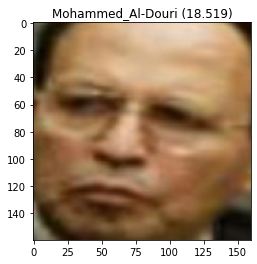

In [27]:
from random import choice

# 5) Interesting part: plotting the original face and the predicted one
# Load the dataset
data = np.load("custom_lfw_jostel_4.npz")
testX_faces = data["arr_2"]
testy_faces = data["arr_3"]
#testX_faces

# 6) Test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
#print(selection)
#print(random_face_pixels)
print(random_face_class)
#print(random_face_name)

# 7) Prediction for a single face (the one chosen randomly)
samples = np.expand_dims(random_face_emb, axis = 0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
print(samples)
print(yhat_class)
print(yhat_prob)
print("CLASSES")


# 8) Get name of prediction
class_index = yhat_class[0]
class_probability = yhat_prob[0, class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)

#print(class_index)
#print(class_probability)
#print(predict_names)

# 9) Printing data
print("Predicted: %s (%.3f)" % (predict_names[0], class_probability))
print("Expected: %s" % random_face_name[0])

# 10) Plot of face pixels with name and probability
plt.imshow(random_face_pixels)
title = "%s (%.3f)" % (predict_names[0], class_probability)
plt.title(title)
plt.show()

# Model: Reverse Engineering

In [4]:
# Load the model
# the compile = False flag is to prevent a warning message - No training configuration found in the save file

path_to_model = "/home/jose/Documents/IPD441/Proyecto/keras-facenet/model/facenet_keras.h5"
model = load_model(path_to_model)

In [5]:
print(model)
model_summary = model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

Total params: 22,808,144
Trainable params: 22,779,312
Non-trainable params: 28,832
__________________________________________________________________________________________________


In [34]:
pooling_layer = model.get_layer(name = "AvgPool")
print(pooling_layer)

In [43]:
from keras import Model
from keras.layers import GlobalMaxPooling2D, Dropout

model.layers.pop()
#model.summary()
model.layers.pop()
#model.summary()
new_pooling = GlobalMaxPooling2D(name = "MaxPool")
new_pooling = new_pooling(model.layers[-5].output)
print(new_pooling)


# Data from original model
original_dropout = model.get_layer(name = "Dropout")
print(original_dropout)
print(original_dropout.rate)
drop_original = original_dropout.rate
drop_custom = 0.5
dropout = Dropout(drop_original)
dropout = dropout(new_pooling)
print(dropout)

# Last layers obtention
original_bottle = model.get_layer(name = "Bottleneck") # Bottleneck (Dense) uses a linear activation
print(original_bottle)
batchnorm_bottle = model.get_layer(name = "Bottleneck_BatchNorm")
print(batchnorm_bottle)

# Final custom model
original_bottle = original_bottle(dropout)
batchnorm_bottle = batchnorm_bottle(original_bottle)
print(batchnorm_bottle)
model2 = Model(inputs = model.input, outputs = batchnorm_bottle)
print(model2)
model2.summary()
model2.save("custom_jostel_model.h5")

Tensor("MaxPool_8/Identity:0", shape=(None, 1792), dtype=float32)
0.19999999999999996
Tensor("dropout_26/Identity:0", shape=(None, 1792), dtype=float32)
Tensor("Bottleneck_BatchNorm_19/Identity:0", shape=(None, 128), dtype=float32)
Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
_________________________________________________________

__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    114688      Block17_2_Activation[0][0]       
__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    384         Block17_3_Branch_1_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    0           Block17_3_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    114688      Block17_3_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    384         Block17_3_Branch_1_Conv2d_0b_1x7[
__________

In [48]:
# Using CUSTOM JOSTEL MODEL 
# 2) Get Face Embeddings using custom model

# Face embedding obtention (for one face)
def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype("float32")
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean)/std
    samples = np.expand_dims(face_pixels, axis = 0)
    yhat = model.predict(samples)
    return yhat[0]

data = np.load("5-celebrity-faces-dataset.npz")

trainX, trainy, testX, testy = data["arr_0"], data["arr_1"], data["arr_2"], data["arr_3"]
print("Loaded: ", trainX.shape, trainy.shape, testX.shape, testy.shape)

#path_to_model = "/home/jose/Documents/IPD441/Proyecto/keras-facenet/model/facenet_keras.h5"
path_to_model = "/home/jose/Documents/IPD441/Proyecto/keras-facenet/notebook/custom_jostel_model.h5"
model = load_model(path_to_model)

newTrainX = list()
for face_pixels in trainX:
    embedding = get_embedding(model, face_pixels)
    newTrainX.append(embedding)
newTrainX = np.asarray(newTrainX)
print(newTrainX.shape)

newTestX = list()
for face_pixels in testX:
    embedding = get_embedding(model, face_pixels)
    newTestX.append(embedding)
newTestX = np.asarray(newTestX)
print(newTestX.shape)

np.savez_compressed('5-celebrity-faces-dataset-norm.npz',newTrainX, trainy, newTestX, testy)

Loaded:  (93, 160, 160, 3) (93,) (25, 160, 160, 3) (25,)
(93, 128)
(25, 128)


In [49]:
# 1) Load dataset
data = np.load("5-celebrity-faces-dataset-norm.npz")
trainX, trainy, testX, testy = data["arr_0"], data["arr_1"], data["arr_2"], data["arr_3"]
print("Dataset: train=%d, test=%d" % (trainX.shape[0], testX.shape[0]))

Dataset: train=93, test=25


In [50]:
from sklearn.preprocessing import Normalizer, LabelEncoder

# 2) Normalize input vectors
in_encoder = Normalizer(norm = "l2")
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

# 3) Label encode targets
out_encoder = LabelEncoder()
#print(trainy[0])
#print(testy[0])
print(trainy)
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
print(trainy)
testy = out_encoder.transform(testy)
#trainX.shape
#trainy.shape

['ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek'
 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek'
 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'elton_john'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_john' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna'
 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna'
 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna'
 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'jerry_seinfeld' 'mindy_kaling' 'mindy_kaling' 'mind

In [51]:
from sklearn.svm import SVC

# 3) Fit the classification model (an SVC from scikit-learn)
model = SVC(kernel = "linear", probability = True)
model.fit(trainX, trainy)

SVC(kernel='linear', probability=True)

In [52]:
from sklearn.metrics import accuracy_score

# 4) Prediction testing
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)

# Score obtention
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)

# Summarize
print("Accuracy: train=%.3f, test=%.3f" % (score_train*100, score_test*100))

# As expected, given the size of the dataset and the face detection/recognition models used, the
# accuracy is perfect !!

Accuracy: train=100.000, test=100.000


4
[[ 0.03148926  0.0087263  -0.06942569  0.07737535 -0.09345382  0.12323904
  -0.08977201  0.037303    0.0309366  -0.00162207 -0.04087223 -0.01133739
  -0.0772526   0.08778409 -0.08053926 -0.01871415  0.04225137  0.05490978
  -0.08568303  0.02088508  0.06908394 -0.0340755   0.20078391 -0.20100385
   0.13678518 -0.05305205  0.0227295   0.17900896 -0.00411564 -0.10599478
  -0.16225109 -0.00099433  0.05943558 -0.15894917  0.10051396 -0.14802203
  -0.07574509  0.00848557 -0.05258841  0.04356321 -0.2188019  -0.19463447
   0.02852296 -0.0521227   0.09045553 -0.03028387 -0.12369417  0.17086178
   0.09968629 -0.01866942  0.16919066 -0.02636086  0.12835239 -0.06398255
   0.1346791   0.04678382  0.01311219  0.14006563  0.01373983 -0.08987109
  -0.09787288  0.11654496 -0.03646143  0.07178685  0.00734971 -0.02473528
  -0.00538524 -0.07995207 -0.00686755 -0.1965282  -0.08660512 -0.05326878
   0.06292727  0.04213262 -0.07807596 -0.00576672  0.11650939  0.02743735
   0.11315605 -0.06814197  0.0004962

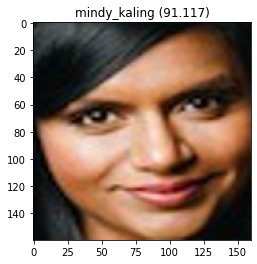

In [63]:
from random import choice

# 5) Interesting part: plotting the original face and the predicted one
# Load the dataset
data = np.load("5-celebrity-faces-dataset.npz")
testX_faces = data["arr_2"]
#testX_faces

# 6) Test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
#print(selection)
#print(random_face_pixels)
print(random_face_class)
#print(random_face_name)

# 7) Prediction for a single face (the one chosen randomly)
samples = np.expand_dims(random_face_emb, axis = 0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
print(samples)
print(yhat_class)
print(yhat_prob)

# 8) Get name of prediction
class_index = yhat_class[0]
class_probability = yhat_prob[0, class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)

#print(class_index)
#print(class_probability)
#print(predict_names)

# 9) Printing data
print("Predicted: %s (%.3f)" % (predict_names[0], class_probability))
print("Expected: %s" % random_face_name[0])

# 10) Plot of face pixels with name and probability
plt.imshow(random_face_pixels)
title = "%s (%.3f)" % (predict_names[0], class_probability)
plt.title(title)
plt.show()